# Goodreads reviews EDA

In this notebook we analyse the dataset from goodreads published in kaggle (link)

## Main findings

- TODO

In [1]:
import pandas as pd
import seaborn as sns
import glob
import tqdm
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 1) Load data and Overview

- Remove csv files that do not contain description

In [2]:
block_list = ['../data/book1-100k.csv',
              '../data/book100-200k.csv',
              '../data/book200-300k.csv',
              '../data/book300-400k.csv',
              '../data/book400-500k.csv',
              '../data/book500-600k.csv',
              ]
file_names = glob.glob('../data/book*.csv')

dfs = []

for file_name in tqdm.tqdm(file_names):
   if file_name not in block_list:
       df = pd.read_csv(file_name)
       if 'pagesNumber' in df.columns:
           df.rename(columns = {'pagesNumber' : 'PagesNumber'}, inplace=True)
       dfs.append(df)
       break

df = pd.concat(dfs)
del dfs

  0%|          | 0/23 [00:00<?, ?it/s]


In [3]:
df.size

827659

In [4]:
df.dtypes

Id                   int64
Name                object
Authors             object
ISBN                object
Rating             float64
PublishYear          int64
PublishMonth         int64
PublishDay           int64
Publisher           object
RatingDist5         object
RatingDist4         object
RatingDist3         object
RatingDist2         object
RatingDist1         object
RatingDistTotal     object
CountsOfReview       int64
Language            object
PagesNumber          int64
Description         object
dtype: object

In [5]:
df.describe()

,Id,Rating,PublishYear,PublishMonth,PublishDay,CountsOfReview,PagesNumber
count,4.356100e+04,43561.000000,43561.000000,43561.000000,43561.000000,43561.000000,43561.00000
mean,1.950255e+06,2.998078,1998.257708,6.287321,9.565850,3.281995,266.19607
std,2.898409e+04,1.656122,12.528316,3.685906,10.462074,63.532719,315.21144
min,1.900511e+06,0.000000,200.000000,1.000000,1.000000,0.000000,0.00000
25%,1.924794e+06,2.860000,1994.000000,3.000000,1.000000,0.000000,144.00000
50%,1.950418e+06,3.690000,2000.000000,6.000000,3.000000,0.000000,234.00000
75%,1.975687e+06,4.000000,2005.000000,10.000000,17.000000,1.000000,336.00000
max,1.999995e+06,5.000000,2022.000000,12.000000,31.000000,9276.000000,40815.00000


In [6]:
df.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description
0,1900511,Barbarossa,Christopher Ailsby,1840138009,3.0,2007,4,1,New Line Books,5:0,4:0,3:1,2:0,1:0,total:1,0,NaN,192,"On 22 June 1941, Adolf Hitler launched Operati..."
1,1900512,Collector's Guide to German World War II: Comb...,Christopher Ailsby,0781802253,0.0,1994,7,1,Hippocrene Books,5:0,4:0,3:0,2:0,1:0,total:0,0,NaN,160,NaN
2,1900514,Images of Barbarossa,Christopher Ailsby,0711028257,3.5,2001,1,25,Ian Allan Ltd,5:0,4:5,3:2,2:1,1:0,total:8,0,NaN,256,"On 22 June 1941, Adolf Hitler launched Operati..."
3,1900520,Romania After 2000: Five New Romanian Plays,Daniel Charles Gerould,0595436560,4.0,2007,9,1,Martin E. Segal Theatre Center Publications,5:1,4:4,3:1,2:0,1:0,total:6,0,NaN,226,The first anthology of new Romanian Drama publ...
4,1900521,Global Foreigners: An Anthology of Plays,Saviana Stănescu,1905422423,4.6,2006,12,7,Seagull Books,5:4,4:0,3:1,2:0,1:0,total:5,0,NaN,320,"In Waxing West, Daniella, newly arrived in the..."


# 2) Check for Duplications

- There are no fully duplicated rows

In [7]:
df.duplicated(keep=False).sum()

0

# 3) Check & Address NaN

In [8]:
df.isna().sum()

Id                     0
Name                   0
Authors                0
ISBN                 141
Rating                 0
PublishYear            0
PublishMonth           0
PublishDay             0
Publisher            509
RatingDist5            0
RatingDist4            0
RatingDist3            0
RatingDist2            0
RatingDist1            0
RatingDistTotal        0
CountsOfReview         0
Language           38106
PagesNumber            0
Description         8337
dtype: int64

## Publisher:

- If publisher is NaN, it's usually classics or religious (e.g. the Bible, or Plato's Republic)

In [9]:
df[df['Publisher'].isna()]['Name'].head(10)

368                           Lost Dimension Zero Gravity
381                                  écureuil noir: roman
382                                     Le Roman Colonial
524     Memorial Volumes to Jewish Communities Destroy...
585                                      Without Feathers
590     Guidelines for drinking-water quality. First a...
746                              Die Herrin von Sherwood.
765                          Building Geographic Literacy
812                               Mundo del fin del mundo
1006               America's History Through Young Voices
Name: Name, dtype: object

- We have decided to encode NaN Publisher values as "Unknown"

In [10]:
print(df['Publisher'].isna().sum().astype(str) + ' NaN values replaced by "Unknown"')
df['Publisher'] = df['Publisher'].fillna("Unknown")

509 NaN values replaced by "Unknown"


## Language:



- The majority of the titles of the dataset are in English.

In [11]:
df['Language'].value_counts().head(10)

eng      3546
ger       487
fre       430
en-US     345
jpn       216
en-GB     176
spa       146
por        25
ita        15
nl         11
Name: Language, dtype: int64

- We have applied a heuristic tool with the most popular English stopwords to check if the Name (Title) of books with NaN values for Language contained them. The vast majority did.

In [12]:
import spacy
from spacy.lang.en import STOP_WORDS

eng_stop_words = spacy.lang.en.STOP_WORDS
nan_language_books = df[df['Language'].isna()]

def contains_eng_stopword(name):
    return any(word in name for word in eng_stop_words)

eng_counter = nan_language_books.Name.apply(contains_eng_stopword).sum()

print(f' {round(eng_counter*100/len(nan_language_books), 2)} % of books with NaN values for Language contained English stopwords.')

 99.08 % of books with NaN values for Language contained English stopwords.


- With the two considerations above, we have decided to encode NaN "Language" values as "eng"

In [13]:
print(df['Language'].isna().sum().astype(str) + ' NaN values replaced by "eng"')
df['Language'] = df['Language'].fillna('eng')

38106 NaN values replaced by "eng"


- After checking unique values for "Language", we have also decided to encode all variations of English as "eng"

In [14]:
df['Language'].unique()

array(['eng', 'en-US', 'en-GB', 'fre', 'spa', 'swe', 'ger', 'ita', 'sco',
       'rum', 'pol', 'jpn', 'nl', 'por', 'zho', 'kor', 'ind', 'lat',
       'gmh', 'msa', 'mul', 'per', 'eus', 'nor', 'wel', 'enm', 'rus',
       'grc', 'ara', 'ave', 'tur', 'epo', 'dan', 'mga', 'gla', 'gre'],
      dtype=object)

In [15]:
language_mask = df['Language'].str.startswith('en-')
english_varieties = df.loc[language_mask, 'Language']
print(english_varieties.count().astype(str) + ' values standardised as "eng"')
english_varieties = 'eng'

521 values standardised as "eng"


- To simplify the scope of this project, we will drop all entries that are not in English

In [16]:
print(df['Language'][df.Language != 'eng'].count().astype(str) + ' non-English books removed"')
df = df.drop(df[df.Language != 'eng'].index)

1909 non-English books removed"


## ISBN

- This column is not relevant for the analysis, so we have decided to drop it.

In [17]:
df = df.drop(columns='ISBN')

## Descriptions
- Check if books without description are duplicated in the dataset (Name)

In [18]:
print(f'{round(df.Description.isna().sum()*100/df.size, 2)}% of the books in the dataset lack a description')

1.06% of the books in the dataset lack a description


In [19]:
books_unique_names_na_description = df[df['Description'].isna()].Name.unique()
books_with_description = df[~df.Description.isna()]
books_with_description_which_appear_also_without_description = books_with_description[books_with_description.Name.isin(books_unique_names_na_description)].Name.unique()


print(f'{round(books_with_description_which_appear_also_without_description.size *100 /  books_unique_names_na_description.size, 2)} % of the books with NaN descriptions have a repetition with description')

0.0 % of the books with NaN descriptions have a repetition with description


- We are dropping books without description from the dataset.

In [20]:
df.dropna(subset= 'Description', inplace=True)

# 3) Check dates and replace by datetime format

## Months & Days
- Month and date are noisy variables and have format problems, so we will drop both columns.

In [21]:
df = df.drop(columns=['PublishMonth', 'PublishDay'])

## Year

- Remove all rows with year before the minimum of timestamp (1677)

In [22]:
print(f"Books before {pd.Timestamp.min.year} dropped: {(df['PublishYear'] <= pd.Timestamp.min.year).sum()}")

Books before 1677 dropped: 0


In [23]:
df = df.drop(df[df['PublishYear'] <= pd.Timestamp.min.year].index)

- Remove all rows with year after the current (probably wrong data)

In [24]:
from datetime import date
print(f"Books after {date.today().year} dropped: {(df['PublishYear'] >= date.today().year).sum()}")

Books after 2022 dropped: 1


In [25]:
df = df.drop(df[df['PublishYear'] >= date.today().year].index)

<AxesSubplot: >

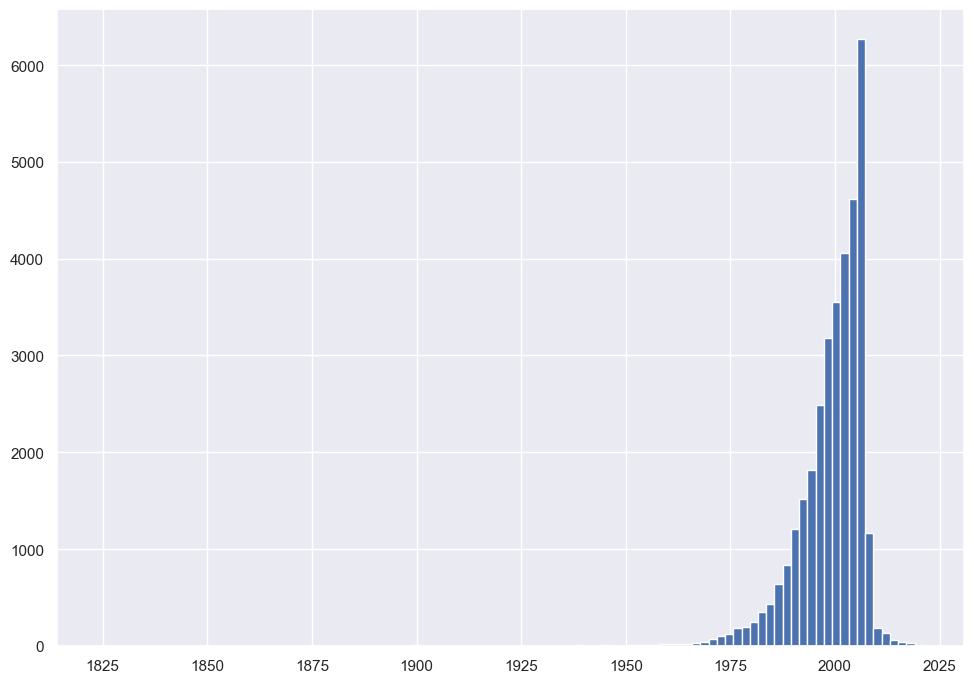

In [26]:
df.PublishYear.hist(bins=100)

- Convert year to datetime format

In [27]:
df['PublishYear'] = pd.to_datetime(df['PublishYear'], format='%Y')

# 4) Cleaning RatingDistTotal

- Remove "total:" from column and convert to int.

In [28]:
df['RatingDistTotal'] = df['RatingDistTotal'].str.replace("total:", "").astype(int)

# 5) Questions about the data

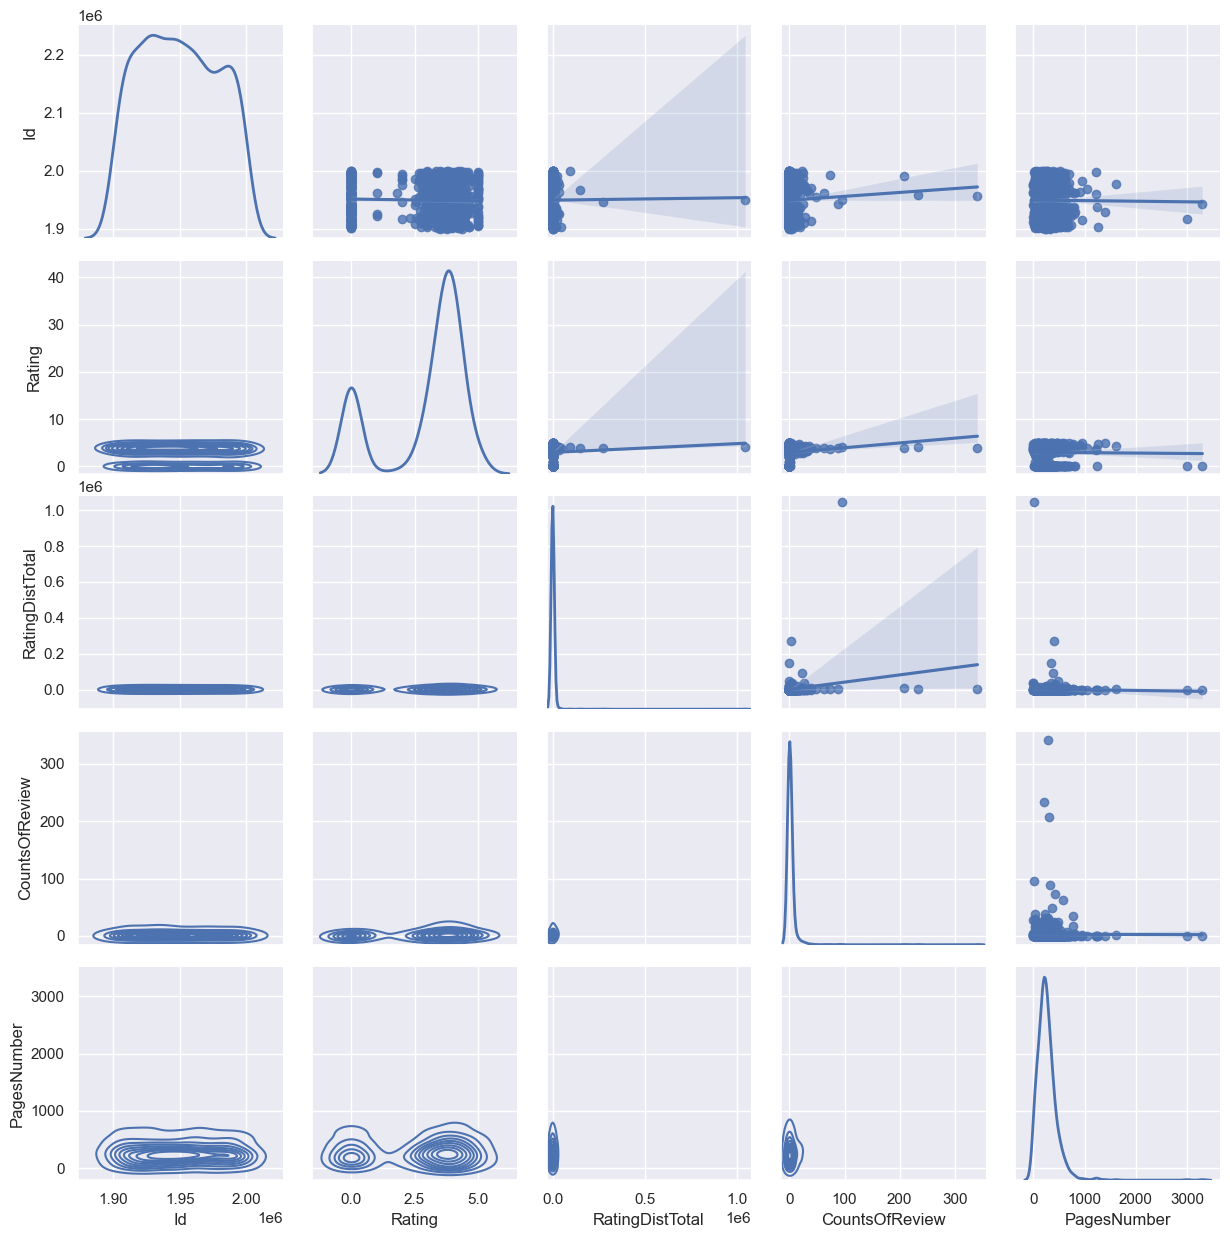

In [32]:
g = sns.PairGrid(df.sample(1000), diag_sharey=False)
g.map_upper(sns.regplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

- Who are the top 5 most rated authors?

In [33]:
df.groupby('Authors')['RatingDistTotal'].sum().sort_values(ascending = False).head()

Authors
Charlotte Brontë    3297355
Roald Dahl          3209926
J.R.R. Tolkien      2532301
J.K. Rowling        2381953
Lewis Carroll       2289571
Name: RatingDistTotal, dtype: int64

- How many different publishers are there?

In [34]:
df['Publisher'].nunique()

6104

- Who are the top 5 publishers (most published books)?

In [35]:
df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head()

Publisher
Routledge                       835
Springer                        813
Oxford University Press, USA    548
Cambridge University Press      526
Wiley                           315
dtype: int64

- Which are the top 5 longest books in the dataset?

In [36]:
df[['PagesNumber', 'Name']].sort_values(by=['PagesNumber'], ascending=False).head()

,PagesNumber,Name
11050,40815,"21st Century Complete Guide to the Gulf War, O..."
34499,20365,"Geothermal: Clean Power for the Future, Energy..."
36479,9998,Thinking Mathematically
13565,9998,The Foundations of Dual Language Instruction
8757,9998,PostgreSQL


- What is the average/median rating of all books?

In [37]:
df['Rating'].describe()

count    33695.000000
mean         3.081445
std          1.594600
min          0.000000
25%          3.000000
50%          3.710000
75%          4.010000
max          5.000000
Name: Rating, dtype: float64

- Does publisher explain the rating?

[Text(0, 0, 'Turtleback Books'),
 Text(1, 0, 'Penguin Books'),
 Text(2, 0, 'Ballantine Books'),
 Text(3, 0, 'HarperCollins Publishers'),
 Text(4, 0, 'University of California Press'),
 Text(5, 0, 'Bantam'),
 Text(6, 0, 'Thorndike Press'),
 Text(7, 0, 'Dover Publications'),
 Text(8, 0, "St. Martin's Press"),
 Text(9, 0, 'Princeton University Press'),
 Text(10, 0, 'Kessinger Publishing'),
 Text(11, 0, 'Pearson'),
 Text(12, 0, 'Prentice Hall'),
 Text(13, 0, 'Oxford University Press, USA'),
 Text(14, 0, 'John Wiley & Sons'),
 Text(15, 0, 'Unknown'),
 Text(16, 0, 'Cambridge University Press'),
 Text(17, 0, 'Cengage Learning'),
 Text(18, 0, 'State University of New York Press'),
 Text(19, 0, 'Wiley'),
 Text(20, 0, 'Rowman & Littlefield Publishers'),
 Text(21, 0, 'Palgrave Macmillan'),
 Text(22, 0, 'Wiley-Blackwell'),
 Text(23, 0, 'Routledge'),
 Text(24, 0, 'iUniverse'),
 Text(25, 0, 'CRC Press'),
 Text(26, 0, 'Authorhouse'),
 Text(27, 0, 'Springer'),
 Text(28, 0, 'National Academies Press'),

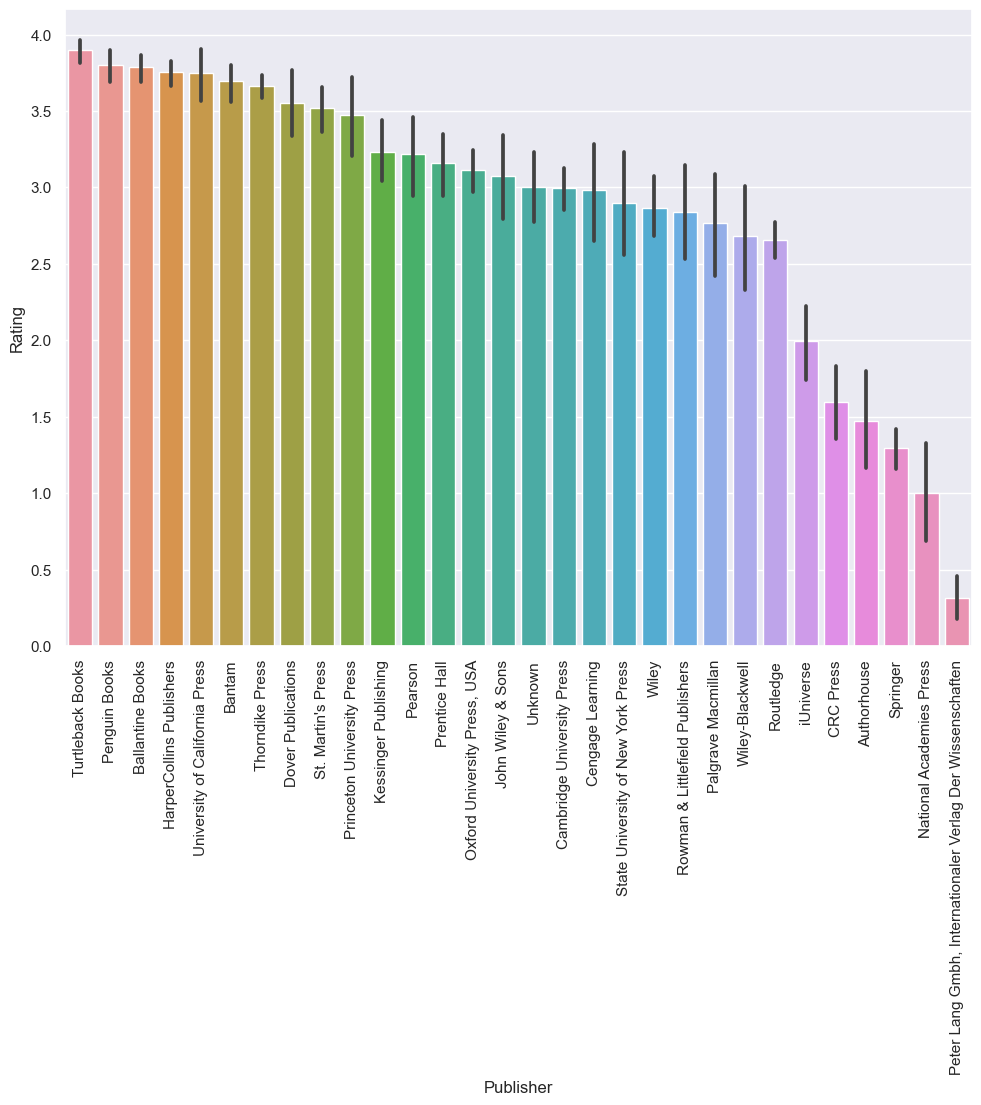

In [38]:
top_publishers = df.pivot_table(index=['Publisher'], aggfunc ='size').sort_values(ascending=False).head(30)
books_from_top_publishers = df[df['Publisher'].isin(top_publishers.index)]
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').Rating.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='Rating',  
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does publisher explain amount of reviews?

[Text(0, 0, 'Turtleback Books'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Penguin Books'),
 Text(3, 0, 'Thorndike Press'),
 Text(4, 0, 'Ballantine Books'),
 Text(5, 0, 'Dover Publications'),
 Text(6, 0, 'HarperCollins Publishers'),
 Text(7, 0, 'Bantam'),
 Text(8, 0, 'Oxford University Press, USA'),
 Text(9, 0, 'Kessinger Publishing'),
 Text(10, 0, "St. Martin's Press"),
 Text(11, 0, 'University of California Press'),
 Text(12, 0, 'Palgrave Macmillan'),
 Text(13, 0, 'Prentice Hall'),
 Text(14, 0, 'Authorhouse'),
 Text(15, 0, 'Wiley'),
 Text(16, 0, 'Routledge'),
 Text(17, 0, 'John Wiley & Sons'),
 Text(18, 0, 'iUniverse'),
 Text(19, 0, 'Cambridge University Press'),
 Text(20, 0, 'Wiley-Blackwell'),
 Text(21, 0, 'Princeton University Press'),
 Text(22, 0, 'Pearson'),
 Text(23, 0, 'Rowman & Littlefield Publishers'),
 Text(24, 0, 'Cengage Learning'),
 Text(25, 0, 'State University of New York Press'),
 Text(26, 0, 'Springer'),
 Text(27, 0, 'CRC Press'),
 Text(28, 0, 'Peter Lang Gmbh, Internatio

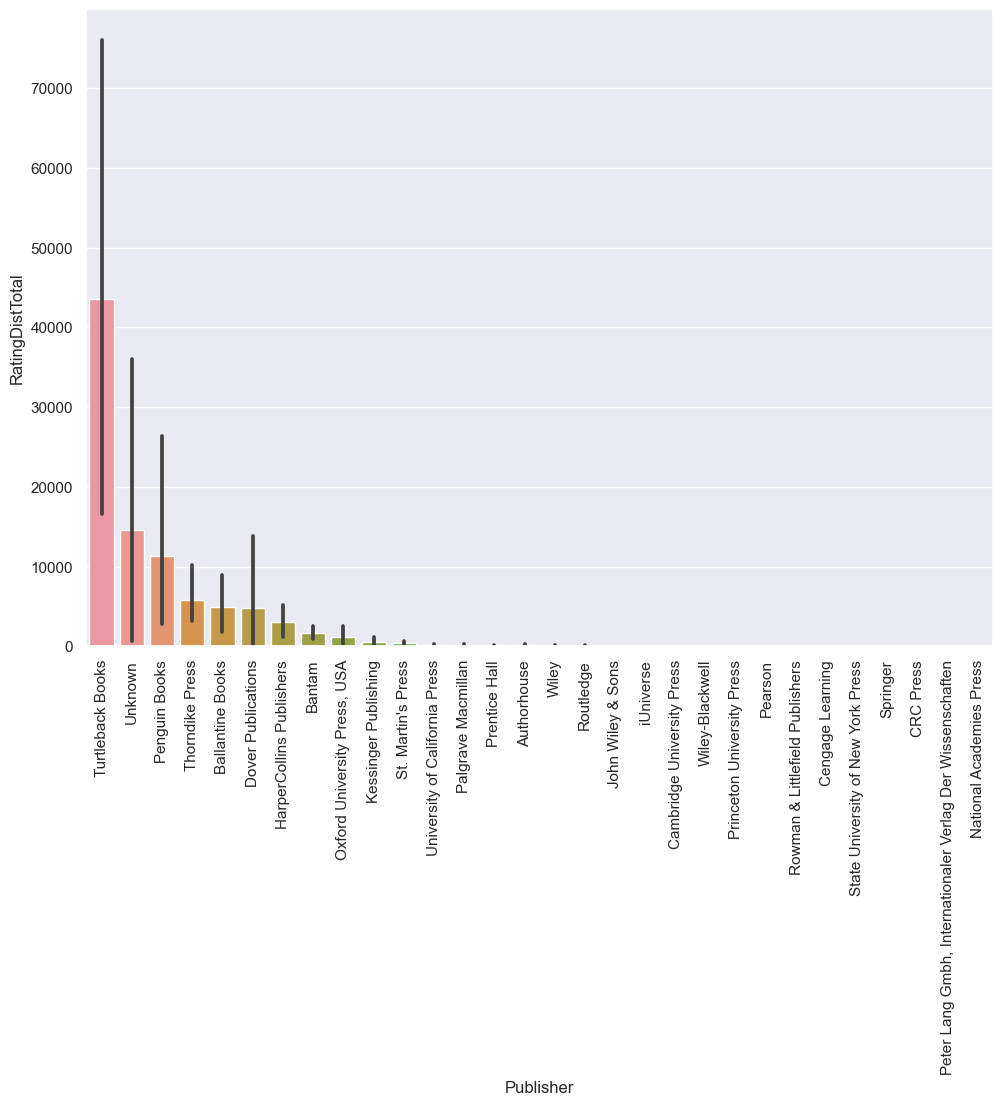

In [39]:
publishers_in_desc_order = books_from_top_publishers.groupby('Publisher').RatingDistTotal.mean().sort_values(ascending=False).index

g = sns.barplot(data=books_from_top_publishers, 
                x='Publisher', 
                y='RatingDistTotal',
                order=publishers_in_desc_order)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

- Does the number of pages impact the amount of reviews?

[(0.0, 5000.0)]

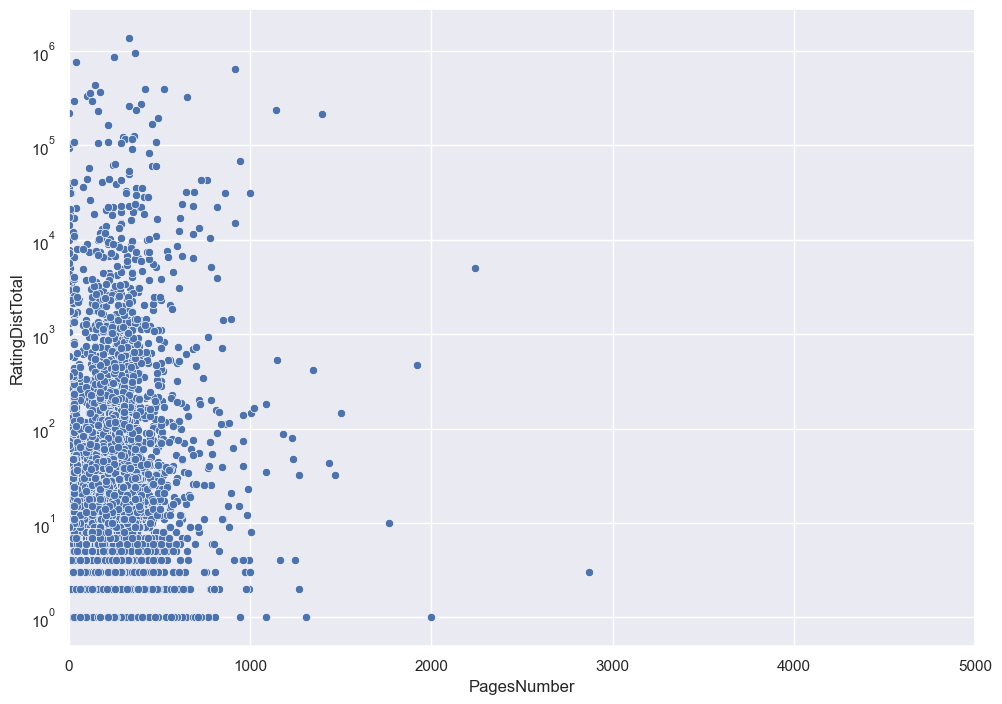

In [44]:
g = sns.scatterplot(data=df.sample(5000),
                x='PagesNumber',
                y='RatingDistTotal')
g.set(yscale='log')
# g.set(ylim=(0, ))
g.set(xlim=(0, 5000))

- Does the number of reviews impact the rating?

[(0.0, 10000.0)]

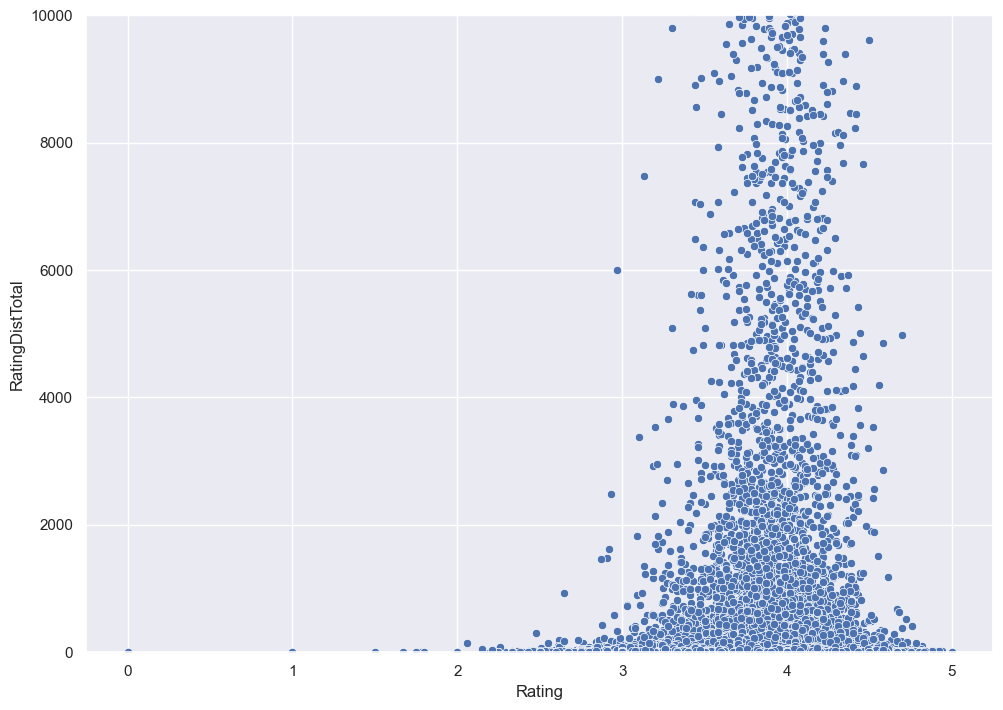

In [47]:
g = sns.scatterplot(data=df,
                x='Rating',
                y='RatingDistTotal')
g.set(ylim=(0, 10000))

- Is there a relationship between time since publication and amount of reviews?

[(1900, 22225.7)]

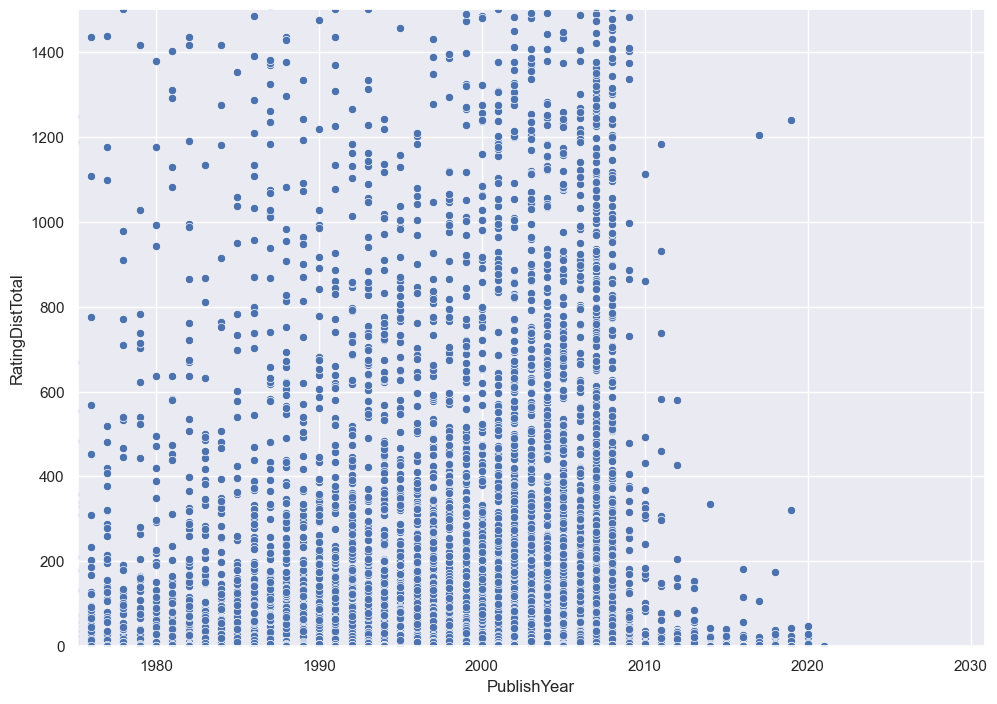

In [48]:
g = sns.scatterplot(data=df,
                x='PublishYear',
                y='RatingDistTotal')
g.set(ylim=(0, 1500))
g.set(xlim=(1900, None))



# NLP related analysis
- Most common words in titles (tokenization + countvectorizer)
- Which are the rarest words (tokenization + countevectorizer)